In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
cd /content/drive/MyDrive/Notebook 2

/content/drive/MyDrive/Notebook 2


In [152]:
ls

 dataset/  'pertemuan 11_image classification 2.ipynb'


In [153]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [154]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images....")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images....


In [155]:
# loop over our input images
for imagePath in imagePaths:
  # load the input image from disk, resize it to 64x64 pixels, scale
  # the pixel intensities to the range [0, 1], and then update our
  # images list
  image = Image.open(imagePath)
  image = np.array(image.resize((64, 64))) / 255.0
  data.append(image)
  
  # extract the class label from the file path and update the 
  # labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [156]:
print(labels)

['GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02', 'GMB_02',

In [158]:
# endcode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [159]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [338]:
# perform a training and testing split using 75% of data for 
# training and 25% and evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [339]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense
        
model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))
      
model1.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               313700    
_________________________________________________________________
dense_23 (Dense)             (None, 5)               

In [340]:
model1.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               313700    
_________________________________________________________________
dense_23 (Dense)             (None, 5)               

In [341]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [342]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 1s 72ms/step - loss: 1.6130 - accuracy: 0.2146 - val_loss: 1.6473 - val_accuracy: 0.1781
Epoch 2/25
14/14 [==============================] - 1s 63ms/step - loss: 1.4595 - accuracy: 0.3676 - val_loss: 1.4562 - val_accuracy: 0.3082
Epoch 3/25
14/14 [==============================] - 1s 63ms/step - loss: 1.2710 - accuracy: 0.4886 - val_loss: 1.3648 - val_accuracy: 0.4452
Epoch 4/25
14/14 [==============================] - 1s 66ms/step - loss: 1.1049 - accuracy: 0.5708 - val_loss: 1.2860 - val_accuracy: 0.4521
Epoch 5/25
14/14 [==============================] - 1s 64ms/step - loss: 1.0084 - accuracy: 0.5639 - val_loss: 1.2478 - val_accuracy: 0.4589
Epoch 6/25
14/14 [==============================] - 1s 64ms/step - loss: 0.9531 - accuracy: 0.5982 - val_loss: 1.2726 - val_accuracy: 0.4452
Epoch 7/25
14/14 [==============================] - 1s 64ms/step - loss: 0.8826 - accuracy: 0.6689 - val_loss: 1.0913 - val_accuracy: 0.5959
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


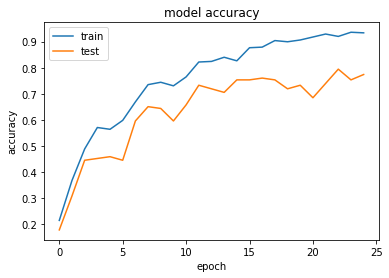

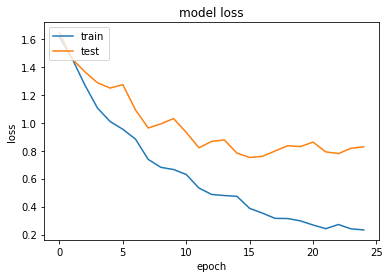

In [343]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [358]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	      predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...


TypeError: ignored

In [233]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [359]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

TypeError: ignored

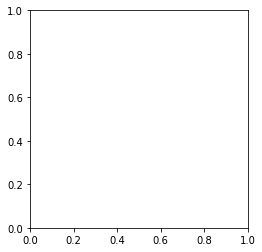

In [363]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [335]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((32, 32))) / 255.0
image_testing.shape

FileNotFoundError: ignored

In [237]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

NameError: ignored

In [364]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

NameError: ignored